### Create a cross-section of geopotiential height for a specific region

Uses iris to open raw UM model data - predates automatic netCDF conversion in the AUS2200 suite. Useful for diagnosing model instabilities.

In [1]:
import xarray as xr
import datetime
import cartopy.crs as ccrs
from matplotlib import pyplot as plt, animation
from glob import glob
import iris

In [2]:
ts1=30
starttime=datetime.datetime(year=2022,month=2,day=21,hour=18)
td1=datetime.timedelta(seconds=ts1)

ts2=75
td2=datetime.timedelta(seconds=ts2)

tdg=datetime.timedelta(seconds=15)

In [3]:
ds=xr.open_dataset(f"/g/data/hh5/tmp/WACI-Hackathon-2023/AUS2200/data/surf/1hr/orog_1hr_{(starttime + datetime.timedelta(hours=7)).strftime('%Y%m%d')}_20220307.nc")

In [4]:
x_min=min(ds.longitude)
x_max=max(ds.longitude)
y_min=min(ds.latitude)
y_max=max(ds.latitude)
ex=(x_min,x_max,y_min,y_max)
x_minf=x_min.data.item()
x_maxf=x_max.data.item()
y_minf=y_min.data.item()
y_maxf=y_max.data.item()

In [5]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 2120, longitude: 2600, time: 336)
Coordinates:
  * latitude   (latitude) float32 -48.79 -48.77 -48.75 ... -6.871 -6.852 -6.832
  * longitude  (longitude) float32 107.5 107.5 107.6 107.6 ... 158.9 159.0 159.0
  * time       (time) datetime64[ns] 2022-02-22T00:00:30 ... 2022-03-08
Data variables:
    orog       (time, latitude, longitude) float32 ...
Attributes: (12/25)
    Conventions:          CF-1.6, ACDD-1.3
    title:                AUS2200 UM amip simulation over Australian region f...
    summary:              A limited area model study of the entire Australian...
    source:               UM v12.2 ECMWF ERA5 forecast fields used as forcings
    license:              http://creativecommons.org/licenses/by/4.0/
    product_version:      0.1
    ...                   ...
    geospatial_lon_min:   107.5101
    geospatial_lon_max:   0.0198
    contributor_name:     Sam Green, Paola Petrelli
    contributor_email:    sam.green@unsw.edu.au, paola.petrelli@utas.edu.au
    contributor_url:      https://orcid.org/0000-0003-1129-4676, https://orci...
    contributor_role:     post-processing, post-processing

In [6]:
xr.where(ds.orog[0] < -10,True,False).sum()

<xarray.DataArray 'orog' ()>
array(2)
Coordinates:
    time     datetime64[ns] 2022-02-22T00:00:30

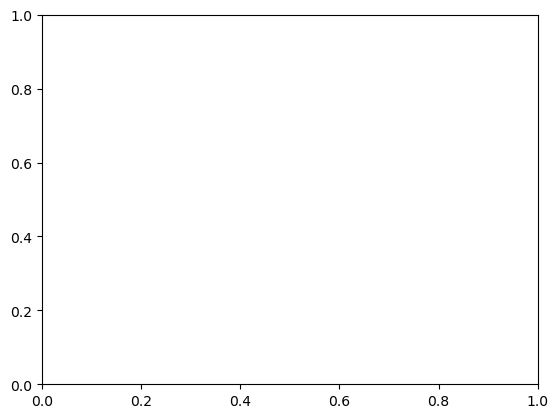

In [7]:
fig, ax1 = plt.subplots()

In [8]:
ds.orog[0].sel(latitude=-6.851597,longitude=slice(143.1,143.5)).plot(ax=ax1)

In [9]:
cubes=iris.load("/scratch/w40/dr4292/aus2200-instability-analysis/30sec/20220222T0000Z/aus2200/d0198/RA3/um/umnsa_mdl_20220222T0000")

/g/data/hh5/public/apps/cms_conda/envs/analysis3-23.01/lib/python3.9/site-packages/iris/fileformats/rules.py:353: UserWarning: Unable to create instance of HybridHeightFactory. The source data contains no field(s) for 'orography'.
  warnings.warn(msg.format(factory=factory_name))


In [10]:
cubes

[<iris 'Cube' of m01s03i468 / (unknown) (model_level_number: 45; latitude: 2120; longitude: 2600)>,
<iris 'Cube' of m01s03i473 / (unknown) (model_level_number: 45; latitude: 2120; longitude: 2600)>,
<iris 'Cube' of air_potential_temperature / (K) (model_level_number: 70; latitude: 2120; longitude: 2600)>,
<iris 'Cube' of air_pressure / (Pa) (model_level_number: 71; latitude: 2120; longitude: 2600)>,
<iris 'Cube' of air_pressure / (Pa) (model_level_number: 70; latitude: 2120; longitude: 2600)>,
<iris 'Cube' of air_temperature / (K) (model_level_number: 70; latitude: 2120; longitude: 2600)>,
<iris 'Cube' of height_above_reference_ellipsoid / (m) (model_level_number: 70; latitude: 2120; longitude: 2600)>,
<iris 'Cube' of height_above_reference_ellipsoid / (m) (model_level_number: 70; latitude: 2120; longitude: 2600)>,
<iris 'Cube' of specific_humidity / (kg kg-1) (model_level_number: 70; latitude: 2120; longitude: 2600)>,
<iris 'Cube' of upward_air_velocity / (m s-1) (model_level_number: 70; latitude: 2120; longitude: 2600)>,
<iris 'Cube' of x_wind / (m s-1) (model_level_number: 70; latitude: 2120; longitude: 2600)>,
<iris 'Cube' of y_wind / (m s-1) (model_level_number: 70; latitude: 2121; longitude: 2600)>]

In [11]:
theta_da=xr.DataArray.from_iris(cubes[6]).chunk({"model_level_number":-1,"latitude":106,"longitude":130})

In [12]:
#small_da=theta_da.sel(latitude=-6.851597,longitude=slice(143.1,143.5))
small_da=theta_da.sel(latitude=-6.851597,method='nearest').sel(longitude=slice(143.09,143.5))

In [13]:
small_da

<xarray.DataArray 'height_above_reference_ellipsoid' (model_level_number: 70,
                                                      longitude: 21)>
dask.array<getitem, shape=(70, 21), dtype=float64, chunksize=(70, 21), chunktype=numpy.ndarray>
Coordinates:
  * model_level_number       (model_level_number) int64 1 2 3 4 ... 67 68 69 70
    latitude                 float32 -6.852
  * longitude                (longitude) float32 143.1 143.1 ... 143.5 143.5
    forecast_period          timedelta64[ns] ...
    forecast_reference_time  datetime64[ns] ...
    time                     datetime64[ns] ...
    level_height             (model_level_number) float64 dask.array<chunksize=(70,), meta=np.ndarray>
    sigma                    (model_level_number) float64 dask.array<chunksize=(70,), meta=np.ndarray>
Attributes:
    standard_name:  height_above_reference_ellipsoid
    units:          m
    source:         Data from Met Office Unified Model
    um_version:     12.2
    STASH:          m01s15i101

In [16]:
small_da[:50].plot.line(hue="model_level_number",ax=ax1)

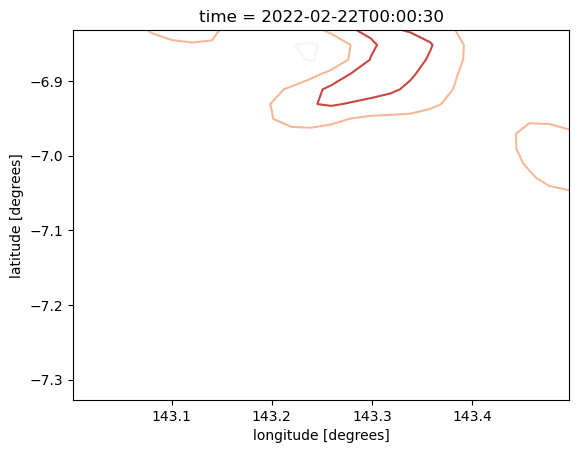

In [30]:
ds.orog[0].sel(longitude=slice(143,143.5),latitude=slice(-7.33,-6.83)).plot.contour()

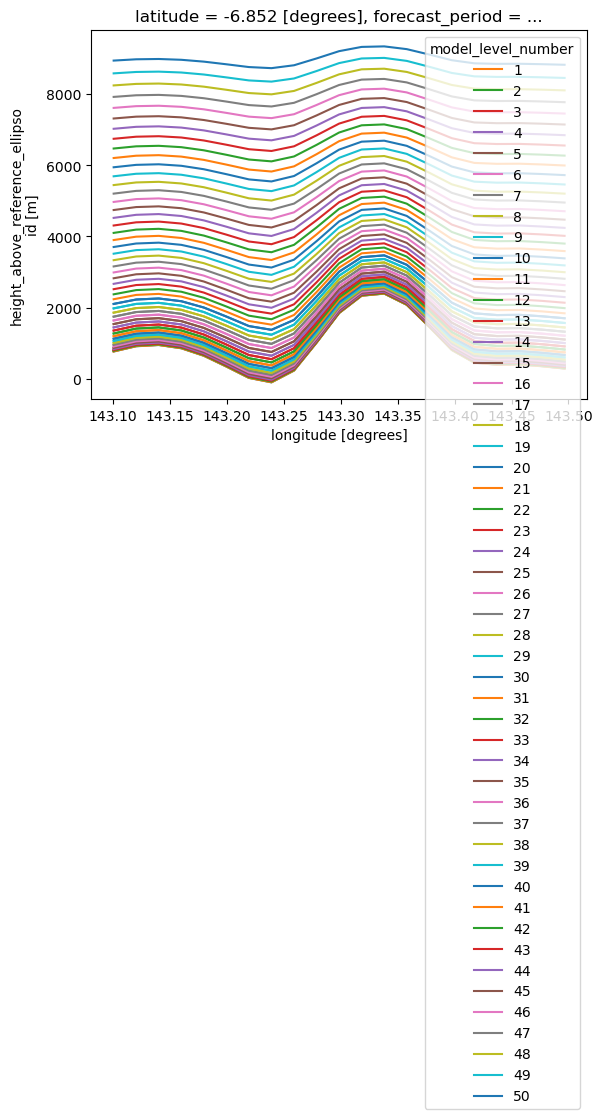

In [17]:
fig